In [ ]:
# ============= PREAMBLE =============
# Last Edited By: Luca Carnegie
# Date: March 28, 2025
# Description: Script that creates some visualizations of the data
# ====================================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from datetime import datetime


# Read in data
df = pd.read_csv('../data/analysis_data/historic_bloom.csv')
# df = pd.read_csv('../data/analysis_data/merged_historic_modern_bloom.csv')

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

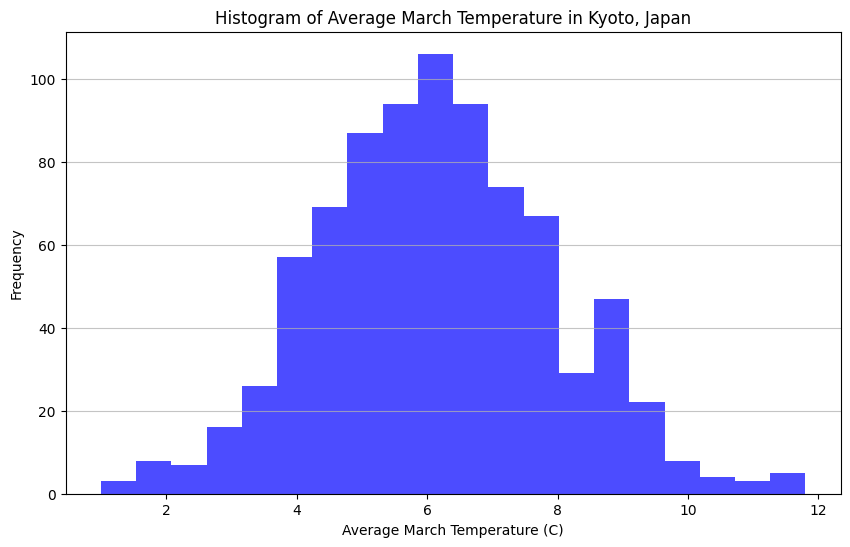

In [15]:
## AVERAGE MARCH TEMPERATURE ##

# Histogram of average march temperature

x = df['avg_temp_march_c']
plt.figure(figsize=(10, 6))
plt.hist(x, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Average March Temperature in Kyoto, Japan')
plt.xlabel('Average March Temperature (C)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

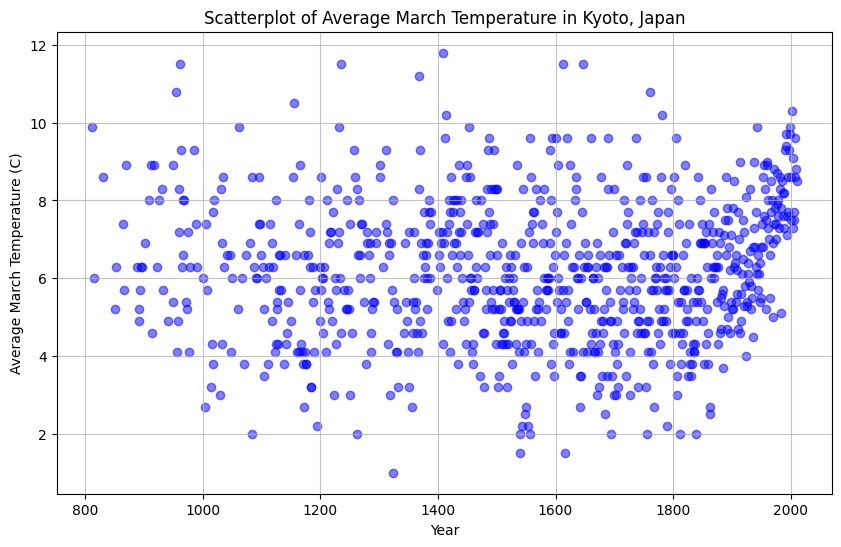

In [ ]:
from scipy.stats import linregress

# Scatterplot of average temperature over the years
y = df['avg_temp_march_c']
x = df['year']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Scatterplot of Average March Temperature in Kyoto, Japan')
plt.xlabel('Year')
plt.ylabel('Average March Temperature (C)')
plt.grid(alpha=0.75)
plt.show()

# Add a trend line
mask = ~np.isnan(x) & ~np.isnan(y)  # Filter out NaN values
if mask.any():  # Check if we have valid data points
    slope, intercept, r_value, p_value, std_err = linregress(x[mask], y[mask])
    trendline = intercept + slope * x
    plt.plot(x, trendline, color='red', linestyle='--', 
             label=f'Trend: y={slope:.4f}x + {intercept:.2f}, R²={r_value**2:.2f}')
    plt.legend()

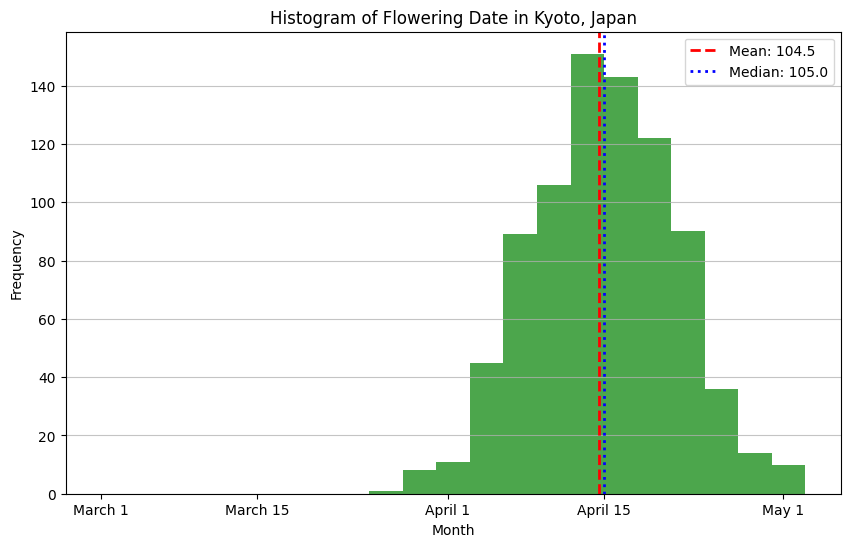

In [ ]:
## FLOWERING DATE ##

# Histogram of flowering date
x = df['flower_doy']
plt.figure(figsize=(10, 6))
plt.hist(x, bins=np.arange(60, 125, 3), color='green', alpha=0.7)  # Changed bin size from 5 to 3
plt.title('Histogram of Flowering Date in Kyoto, Japan')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)



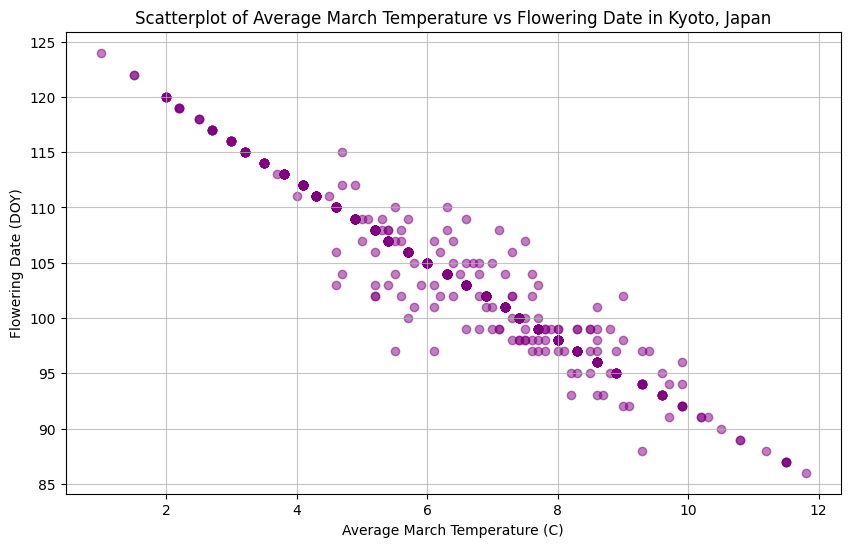

In [4]:
## Scatterplot of average temperature vs flowering date
y = df['flower_doy']
x = df['avg_temp_march_c']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='purple', alpha=0.5)
plt.title('Scatterplot of Average March Temperature vs Flowering Date in Kyoto, Japan')
plt.xlabel('Average March Temperature (C)')
plt.ylabel('Flowering Date (DOY)')
plt.grid(alpha=0.75)
plt.show()

Text(0, 0.5, 'Approximate Date')

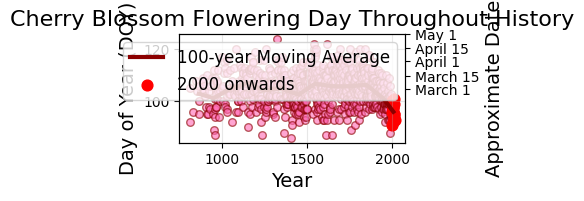

In [5]:
ax1 = plt.subplot(3, 2, 1)

# Filter for non-censored data
non_censored = df[df['censored'] == 0]
# Plot scatter points
ax1.scatter(non_censored['year'], non_censored['flower_doy'], 
            alpha=0.6, c='#FF69B4', edgecolors='#8B0000', s=30)

# Add a trend line using lowess - 100-year moving average
from scipy.stats import linregress
window_size = 100
grouped = non_censored.groupby(non_censored['year'] // window_size * window_size)
avg_years = [group.year.mean() for name, group in grouped]
avg_doys = [group.flower_doy.mean() for name, group in grouped]
ax1.plot(avg_years, avg_doys, '-', color='darkred', linewidth=3, label='100-year Moving Average')

# Highlight recent years (2000 onwards)
recent = non_censored[non_censored['year'] >= 2000]
ax1.scatter(recent['year'], recent['flower_doy'], color='red', s=60, label='2000 onwards')

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Day of Year (DOY)', fontsize=14)
ax1.set_title('Cherry Blossom Flowering Day Throughout History', fontsize=16)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12)

# Add a second y-axis with date interpretations
ax1_right = ax1.twinx()
date_labels = ['March 1', 'March 15', 'April 1', 'April 15', 'May 1']
date_positions = [60, 74, 91, 105, 121]
ax1_right.set_yticks(date_positions)
ax1_right.set_yticklabels(date_labels)
ax1_right.set_ylabel('Approximate Date', fontsize=14)